In [16]:
import pandas as pd
import openpyxl
dataset01 = pd.read_csv('./dataset/kc_data_1.csv')
dataset02 = pd.read_csv('./dataset/kc_data_2.csv')
dataset = pd.concat([dataset01, dataset02])
# 서울만 분리해냄
dataset = dataset[dataset['시도명']=='서울']

guide_date = dataset['기준년월'].unique()
print(guide_date)
dataset_2018 = dataset[dataset['기준년월'] == guide_date[0]]
dataset_2019 = dataset[dataset['기준년월'] == guide_date[1]]
dataset_2020 = dataset[dataset['기준년월'] == guide_date[2]]
dataset = dataset[dataset['기준년월'] == guide_date[0]]

['2018-12' '2019-12' '2020-12']


In [17]:
# 서울시 시군구명 추출
# 결과 : 25개 모두 존재
sigoongu = list(set(dataset['시군구명']))
print(len(sigoongu), '개')
# print(sigoongu)

25 개


In [18]:
# 각 시군구별 업종중분류명 추출
middle = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    middle.extend(temp)
    # print(gu,": ", len(temp),": ", temp)

In [19]:
# 각 시군구별 업종대분류명 추출
big = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    big.extend(temp)
    # print(gu,": ", temp)

In [20]:
# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [22]:
# 시군구별 - 업종대분류 - 매출평균액
gu_big_maechul = {}
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    b_mean = []
    for b in big:
        temp_b = temp[temp['업종대분류명']==b]
        temp_b = temp_b.fillna(0)
        b_mean.append(temp_b['매출평균액'].mean())
    gu_big_maechul[gu] = b_mean
# print(gu_big_maechul)

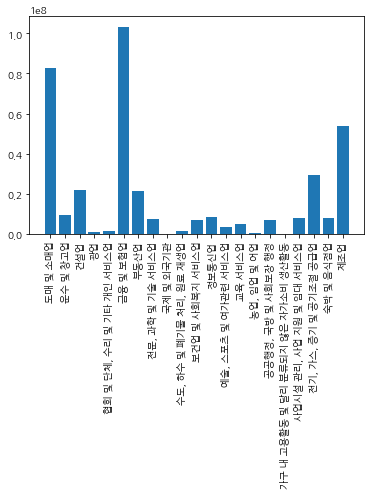

In [23]:
plt.bar(big, gu_big_maechul['강남구'])
plt.xticks(rotation=90)
plt.show()

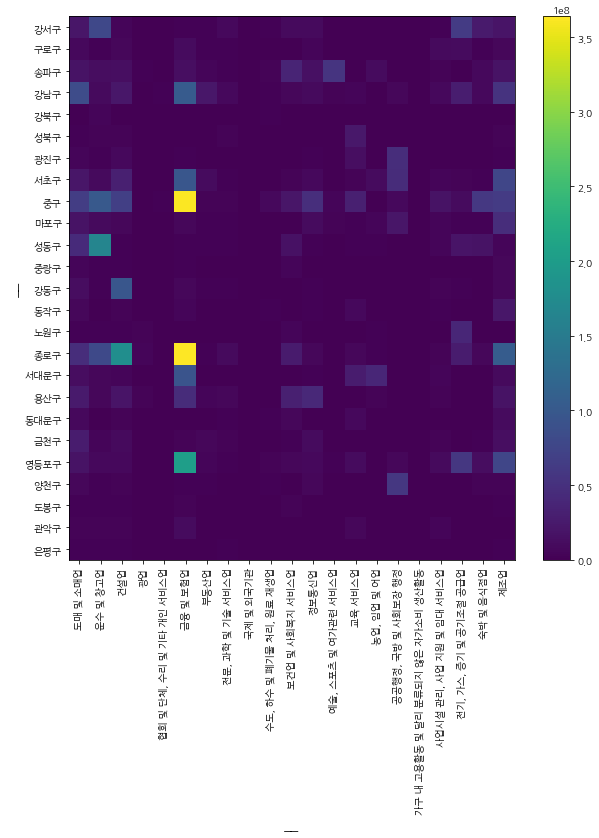

,도매 및 소매업,운수 및 창고업,건설업,광업,"협회 및 단체, 수리 및 기타 개인 서비스업",금융 및 보험업,부동산업,"전문, 과학 및 기술 서비스업",국제 및 외국기관,"수도, 하수 및 폐기물 처리, 원료 재생업",...,정보통신업,"예술, 스포츠 및 여가관련 서비스업",교육 서비스업,"농업, 임업 및 어업","공공행정, 국방 및 사회보장 행정",가구 내 고용활동 및 달리 분류되지 않은 자가소비 생산활동,"사업시설 관리, 사업 지원 및 임대 서비스업","전기, 가스, 증기 및 공기조절 공급업",숙박 및 음식점업,제조업
은평구,1.806044e+06,2.629069e+06,1.737859e+06,0.0,224456.469697,4.600306e+05,5.188931e+05,2.304268e+06,0.0,913446.923077,...,316481.664804,435106.720930,3.608866e+05,11088.454545,0.0,0.0,5.812610e+05,214867.076923,171818.484848,1.555474e+06
관악구,3.021605e+06,3.153465e+06,3.354322e+06,0.0,472679.508475,1.027353e+07,8.025985e+05,7.810541e+05,0.0,816659.761905,...,485101.178295,457956.409836,6.866973e+06,329403.173913,0.0,0.0,4.958039e+06,0.000000,360173.634615,1.397861e+06
도봉구,2.605873e+06,2.327759e+06,1.464811e+06,0.0,228915.506173,2.902691e+06,1.082490e+06,4.036125e+05,0.0,658010.090909,...,180540.568627,36190.238095,5.190823e+04,8639.250000,0.0,0.0,7.753039e+05,0.000000,756790.428571,1.654446e+06


In [67]:
gu_big_maechul_pd = pd.DataFrame(gu_big_maechul, index=big, columns=sigoongu)
gu_big_maechul_pd = gu_big_maechul_pd.fillna(0)
gu_big_maechul_pd = gu_big_maechul_pd.transpose()
plt.figure(figsize=(10,10))
plt.pcolor(gu_big_maechul_pd)
plt.xticks(np.arange(0.5, len(gu_big_maechul_pd.columns), 1), gu_big_maechul_pd.columns, rotation=90)
plt.yticks(np.arange(0.5, len(gu_big_maechul_pd.index), 1), gu_big_maechul_pd.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()
gu_big_maechul_pd.head(3)

In [96]:
# 클러스터링 시도
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = gu_big_maechul_pd.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[0 0 0 0 2 0 0 0 3 1 0 0 0 0 4 0 1 3 0 0 0 3 0 0 4]


In [97]:
gu_big_maechul_pd['cluster_id'] = kmeans.labels_
temp = gu_big_maechul_pd[gu_big_maechul_pd['cluster_id']==2]
temp['cluster_id']

영등포구    2
Name: cluster_id, dtype: int32

In [98]:


# 시군구별 - 업종대분류 - 매출평균액
gu_big_count = {}
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    b_mean = []
    for b in big:
        temp_b = temp[temp['업종대분류명']==b]
        temp_b = temp_b.fillna(0)
        b_mean.append(temp_b['총기업수'].sum())
    gu_big_count[gu] = b_mean
# print(gu_big_count)

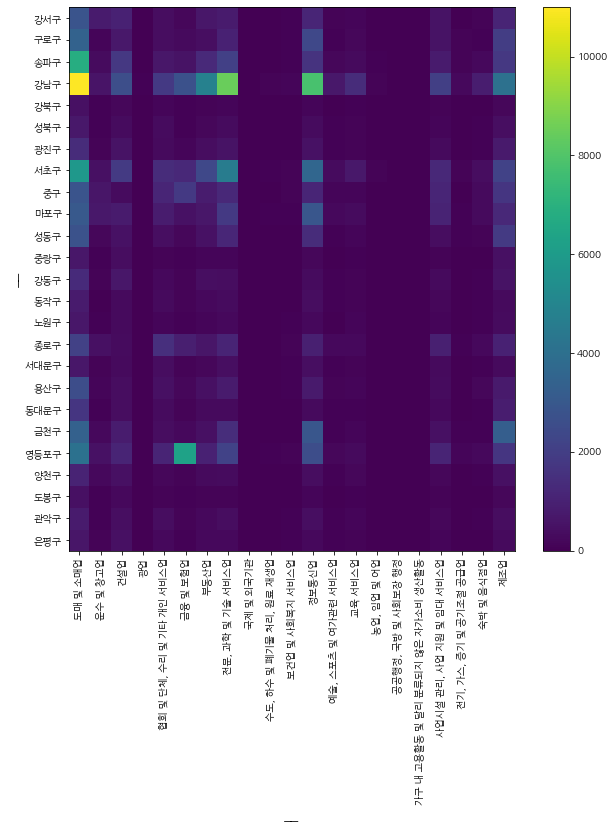

In [99]:
gu_big_count_pd = pd.DataFrame(gu_big_count, index=big, columns=sigoongu)
gu_big_count_pd = gu_big_count_pd.fillna(0)
gu_big_count_pd = gu_big_count_pd.transpose()
plt.figure(figsize=(10,10))
plt.pcolor(gu_big_count_pd)
plt.xticks(np.arange(0.5, len(gu_big_count_pd.columns), 1), gu_big_count_pd.columns, rotation=90)
plt.yticks(np.arange(0.5, len(gu_big_count_pd.index), 1), gu_big_count_pd.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()
# gu_big_count_pd.head(3)

In [100]:
# 클러스터링 시도
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = gu_big_count_pd.values
kmeans = KMeans(n_clusters=3).fit(datapoints)
print(kmeans.labels_)

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 2 1 1 0]


In [103]:
gu_big_maechul_pd['cluster_id'] = kmeans.labels_
temp = gu_big_maechul_pd[gu_big_maechul_pd['cluster_id']==1]
temp['cluster_id']

영등포구    1
금천구     1
마포구     1
중구      1
서초구     1
송파구     1
구로구     1
Name: cluster_id, dtype: int32